Mendeteksi adanya Outlier (Boxplot)
--

Mendeteksi Pencilan dari suatu Nilai (Outlier) salah satunya bisa melihat plot dari data tersebut menggunakan Box Plot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.

 
Gunakan package matplotlib & seaborn untuk memvisualisasika data-data yang mau dilihat box plot nya. Fungsi describe() gunakan saat untuk melihat deskripsi datanya


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7014.000000     7087.000000   7098.000000
mean     32.749358       67.018985   2306.582650
std      25.206376      117.396646   2575.212013
min       0.000000        0.000000     19.000000
25%       9.000000       36.100000    402.925000
50%      30.000000       70.450000   1400.700000
75%      56.000000       89.900000   3801.600000
max     500.000000     9000.000000  80000.000000


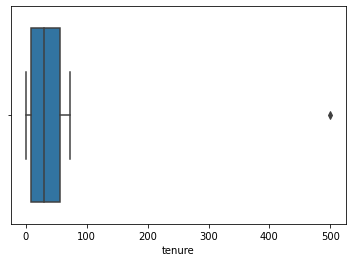

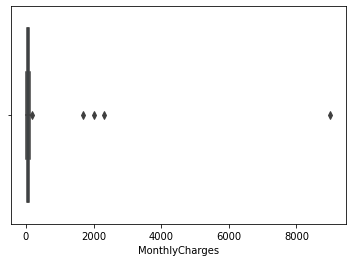

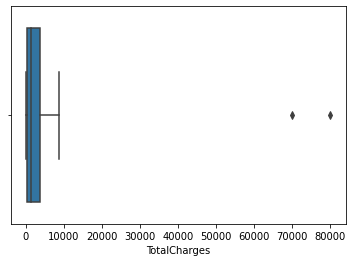

In [1]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

#Your Codes here
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

Mengatasi Outlier
--

Setelah kita mengetahui variable mana saja yang terdapat pencilan (Outlier), selanjutnya kita akan atasi Outlier dengan menggunakan metode interquartile range (IQR). Untuk detil jelasnya, bisa dilihat di ilustrasi di bawah ini:

 

Gunakan hasil dari pengolahan di tahap sebelumnya df_load untuk di olah di tahap ini. Gunakan fungsi quantile() untuk melihat quantile tertentu, dan gunakan mask() untuk mereplace nilai. Tentukan:
- Nilai Minimum dan Maximum data di tolerir
- Ubah Nilai yg di luar Range Minimum & Maximum ke dalam nilai Minimum dan Maximum

In [2]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

# Your code goes here
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             126.5000
MonthlyCharges     170.6000
TotalCharges      8899.6125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -61.5000
MonthlyCharges     -44.6000
TotalCharges     -4695.0875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  7014.000000     7087.000000   7098.000000
mean     32.696108       64.995837   2287.957576
std      24.606516       30.133477   2268.788381
min       0.000000        0.000000     19.000000
25%       9.000000       36.100000    402.925000
50%      30.000000       70.450000   1400.700000
75%      56.000000       89.900000   3801.600000
max     126.500000      170.600000   8899.612500


C:\Users\Yala\AppData\Local\Temp/ipykernel_9356/4053935854.py:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
C:\Users\Yala\AppData\Local\Temp/ipykernel_9356/4053935854.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)
